## Testing hypothesis 3
---

**_Hypothesis_**: Reviews with higher book rating have higher helpfulness ratings.

   - **Metric**: Correlation between average helpfulness ratings for book rating.

**Missing Values**:

  - `review/score`: remove the entire sample
  - `review/helpfulness`: remove the entire sample

**Data Transformation**:
  - `review/score`: groupBy book title and calculate the average score.
  - `review/helpfulness`: $helpfulness = \frac{x}{y} \sqrt(y)$

---

In [84]:
# Definition of a function to calculate many statistics of a given dataset
def scipy_analize(variable_1, varname_1, variable_2, varname_2):
    """
    This function takes two variables and performs the following analysis:
    1. Check if the data are normally distributed
    2. Check the correlation between the two variables
    3. Check if the two variables follow same distribution
    4. Check if the two variables are independent
    5. Check if the mean of the two variables are equal using Wilcoxon
    
    Parameters:
    variable_1: data (i.e. list, array, series, etc.)
    varname_1: string (name of the variable)
    variable_2: data (i.e. list, array, series, etc.)
    varname_2: string (name of the variable)
    
    Returns:
    None
    """
    import scipy.stats as stats
    import pandas as pd
    
    # Check if the data are normally distributed
    score_ntest, p_value_score_ntest = stats.normaltest(variable_1)
    help_ntest, p_value_help_ntest = stats.normaltest(variable_2)
    
    # Print the conclusion
    if p_value_score_ntest < 0.05:
        print(f"The p-value for normality test of {varname_1} is {p_value_score_ntest}. The data is not normally distributed.")
    else:
        print(f"The p-value for normality test of {varname_1} is {p_value_score_ntest}. The data is normally distributed.")
    
    if p_value_help_ntest < 0.05:
        print(f"The p-value for normality test of {varname_2} is {p_value_help_ntest}. The data is not normally distributed.")
    else:
        print(f"The p-value for normality test of {varname_2} is {p_value_help_ntest}. The data is normally distributed.")
        
    if p_value_score_ntest < 0.05 or p_value_help_ntest < 0.05:
        print("Since at least one of the variables is not normally distributed, we will use Spearman's correlation.")
        # Check the correlation between the two variables
        spearman_coeff, p_value_corr = stats.spearmanr(variable_1, variable_2)
        
        # Print the conclusion
        if p_value_corr < 0.05:
            print(f"The p-value for correlation value {spearman_coeff} between {varname_1} and {varname_2} is {p_value_corr}. The correlation is not significant.")
        else:
            print(f"The p-value for correlation value {spearman_coeff} between {varname_1} and {varname_2} is {p_value_corr}. The correlation is significant.")
            
    if p_value_score_ntest > 0.05 and p_value_help_ntest > 0.05:
        print("Since both the variables are normally distributed, we will use Pearson's correlation.")
        # Check the correlation between the two variables
        person_coeff, p_value_corr = stats.pearsonr(variable_1, variable_2)
        
        # Print the conclusion
        if p_value_corr < 0.05:
            print(f"The p-value for correlation value {person_coeff} between {varname_1} and {varname_2} is {p_value_corr}. The correlation is not significant.")
        else:
            print(f"The p-value for correlation value {person_coeff} between {varname_1} and {varname_2} is {p_value_corr}. The correlation is significant.")
        
    # Check if the two variables follow same distribution
    ks_stat, p_value_ks = stats.ks_2samp(variable_1, variable_2)
    
    # Print the conclusion
    if p_value_ks < 0.05:
        print(f"The p-value for Kolmogorov-Smirnov test between {varname_1} and {varname_2} is {p_value_ks}. The two variables do not follow the same distribution.")
    else:
        print(f"The p-value for Kolmogorov-Smirnov test between {varname_1} and {varname_2} is {p_value_ks}. The two variables follow the same distribution.")
        
    # Check if the two variables are independent
    chi2_stat, p_value_chi2, dof, expected = stats.chi2_contingency(pd.crosstab(variable_1, variable_2))
    
    # Print the conclusion
    if p_value_chi2 < 0.05:
        print(f"The p-value for Chi-Square test between {varname_1} and {varname_2} is {p_value_chi2}. The two variables are not independent.")
    else:
        print(f"The p-value for Chi-Square test between {varname_1} and {varname_2} is {p_value_chi2}. The two variables are independent.")
        
    if p_value_score_ntest < 0.05 or p_value_help_ntest < 0.05:
        print("Since at least one of the variables is not normally distributed, we will use Wilcoxon.")
        # Check if the mean of the two variables are equal using Wilcoxon
        wilcoxon_stat, p_value_wilcoxon = stats.wilcoxon(variable_1, variable_2)
        
        # Print the conclusion
        if p_value_wilcoxon < 0.05:
            print(f"The p-value for Wilcoxon test between {varname_1} and {varname_2} is {p_value_wilcoxon}. The two variables do not have the same mean.")
        else:
            print(f"The p-value for Wilcoxon test between {varname_1} and {varname_2} is {p_value_wilcoxon}. The two variables have the same mean.")
    
    if p_value_score_ntest > 0.05 and p_value_help_ntest > 0.05:
        print("Since both the variables are normally distributed, we will use t-test.")
        # Check if the mean of the two variables are equal using t-test
        t_stat, p_value_t = stats.ttest_ind(variable_1, variable_2)
        
        # Print the conclusion
        if p_value_t < 0.05:
            print(f"The p-value for t-test between {varname_1} and {varname_2} is {p_value_t}. The two variables do not have the same mean.")
        else:
            print(f"The p-value for t-test between {varname_1} and {varname_2} is {p_value_t}. The two variables have the same mean.")

In [65]:
# Connect to MongoDB

import pymongo

client = pymongo.MongoClient('mongodb://localhost:27017/')
database = client['spark_db']
books = database['books_hypothesis_3']

The shape of the data is (126505, 4)


<AxesSubplot: title={'center': 'Average Helpfulness Rate for each Score'}, xlabel='review/score'>

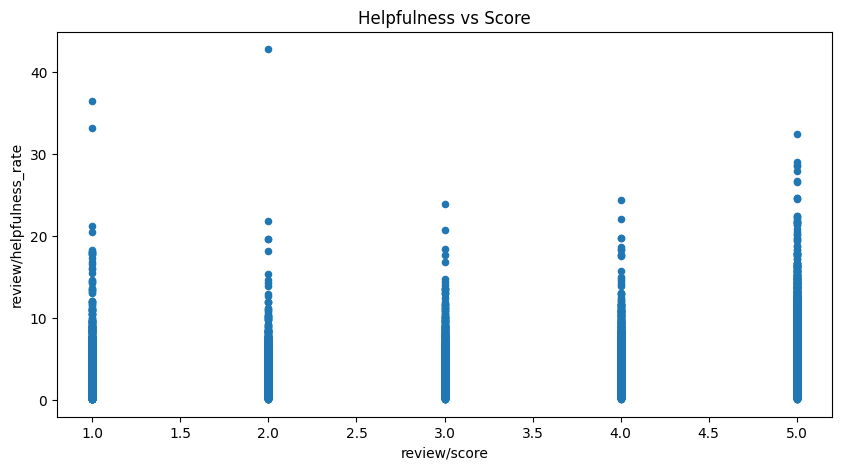

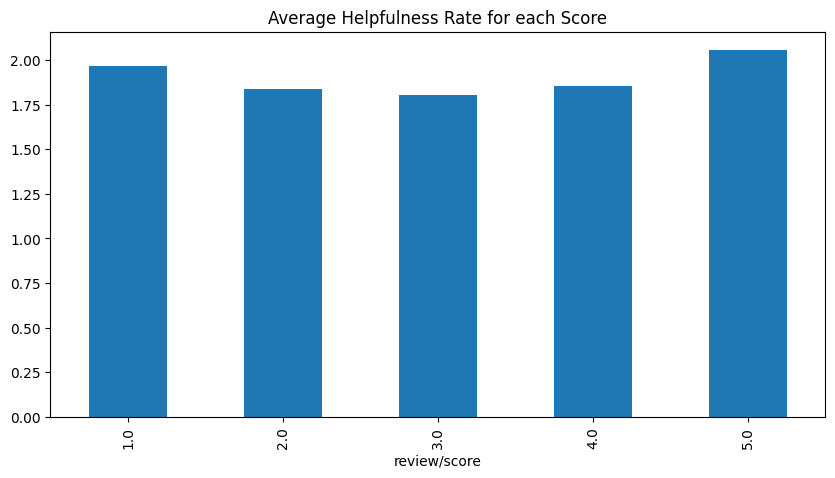

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Remove the samples which have no score or helpfulness data
pipeline_remove = {'$match':{
                        'review/score':{'$exists':True},
                        'N_helpful'	:{'$exists':True, '$ne':0},
                        'Tot_votes'	:{'$exists':True, '$ne':0}
                        }
    
                }

# Retain only the required fields
pipeline_project = {'$project':{
                            'review/score':1,
                            'review/helpfulness_rate':{'$multiply':[
                                                                {'$divide':['$N_helpful','$Tot_votes']},
                                                                {'$sqrt':'$Tot_votes'}
                                                                ]
                                                       },
                            '_id':0,
                            'Tot_votes':1,
                            'N_helpful':1
                                }
                }   

books_data = books.aggregate([pipeline_remove,pipeline_project])

# Convert into Pandas DataFrame
df_data = pd.DataFrame(list(books_data))

# Check the shape of the data
print(f"The shape of the data is {df_data.shape}")

# Plot the results
df_data.plot(kind='scatter', x='review/score', y='review/helpfulness_rate', title='Helpfulness vs Score', figsize=(10,5))

# Compute the average helpfulness rate for each score
plt.figure()
df_grouped_tmp = df_data.groupby('review/score')['review/helpfulness_rate'].mean()
df_grouped_tmp.plot(kind='bar', title='Average Helpfulness Rate for each Score', figsize=(10,5))

### Compute statistics

---

The statistics are used to numerically asses the results of the hypothesis test.

In [70]:
scipy_analize(df_data['review/score'], 'review/score', df_data['review/helpfulness_rate'], 'review/helpfulness_rate')

The p-value for normality test of review/score is 0.0. The data is not normally distributed.
The p-value for normality test of review/helpfulness_rate is 0.0. The data is not normally distributed.
Since at least one of the variables is not normally distributed, we will use Spearman's correlation.
The p-value for correlation between review/score and review/helpfulness_rate is 3.965985157507964e-130. The correlation is not significant.
The p-value for Kolmogorov-Smirnov test between review/score and review/helpfulness_rate is 0.0. The two variables do not follow the same distribution.
The p-value for Chi-Square test between review/score and review/helpfulness_rate is 0.0. The two variables are not independent.
Since at least one of the variables is not normally distributed, we will use Wilcoxon.
The p-value for Wilcoxon test between review/score and review/helpfulness_rate is 0.0. The two variables do not have the same mean.


## Further Analysis on a subset of the data

---

From the previous analysis the following emerged:
- A sort of relation exists between the helpfulness and the book rating when this latter is at the extremes of the scale.
- The helpfulness score should not be considered when the number of votes is low
    - PROBLEM: removing the low number of votes will result in a very small dataset

### - Grouped in 2 bins (1, 5) and (2, 3, 4)

The shape of the data is (126505, 5)


<AxesSubplot: title={'center': 'Average Helpfulness Rate for each Score'}, xlabel='review/score_grouped'>

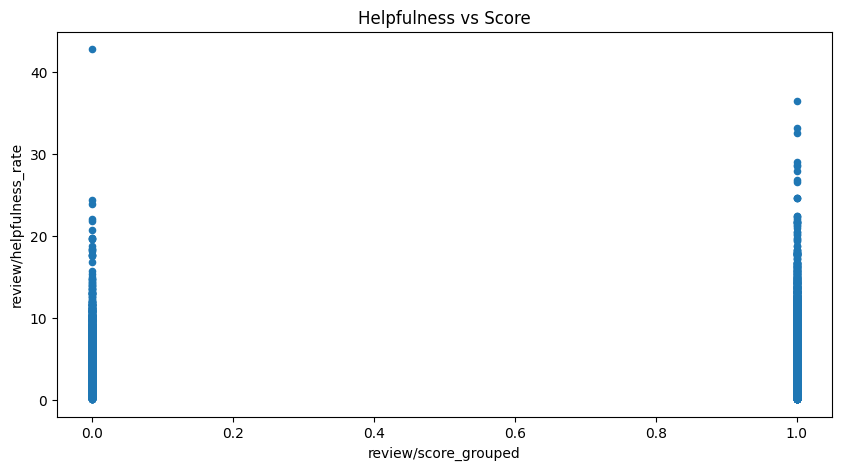

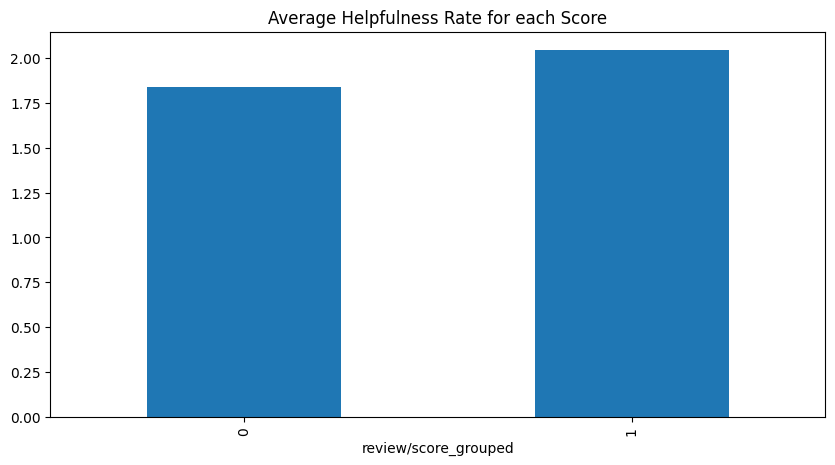

In [7]:
# Group the data having score 1,5 together and 2,3,4 together
df_data['review/score_grouped'] = df_data['review/score'].apply(lambda x: 1 if x==1 or x==5 else 0)

# Check the shape of the data
print(f"The shape of the data is {df_data.shape}")

# Plot the results
df_data.plot(kind='scatter', x='review/score_grouped', y='review/helpfulness_rate', title='Helpfulness vs Score', figsize=(10,5))

# Compute the average helpfulness rate for each score
plt.figure()
df_data.groupby('review/score_grouped')['review/helpfulness_rate'].mean().plot(kind='bar', title='Average Helpfulness Rate for each Score', figsize=(10,5))

### - Filtered on number of votes

The shape of the data is (15144, 4)


<AxesSubplot: title={'center': 'Average Helpfulness Rate for each Score'}, xlabel='review/score'>

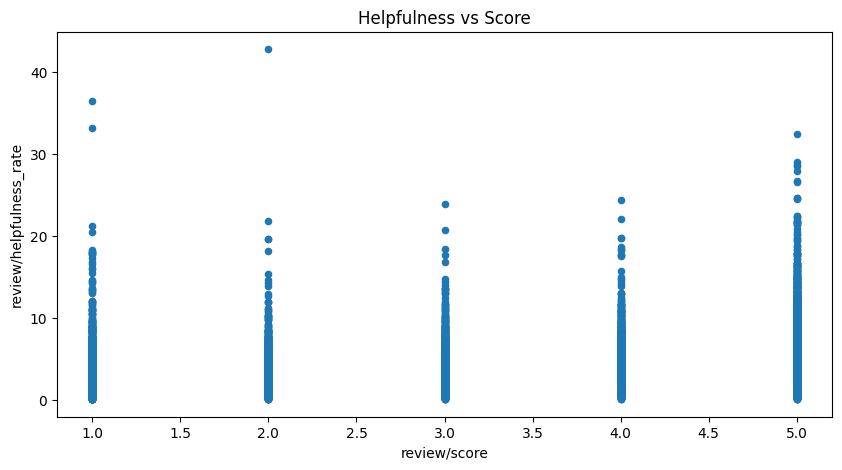

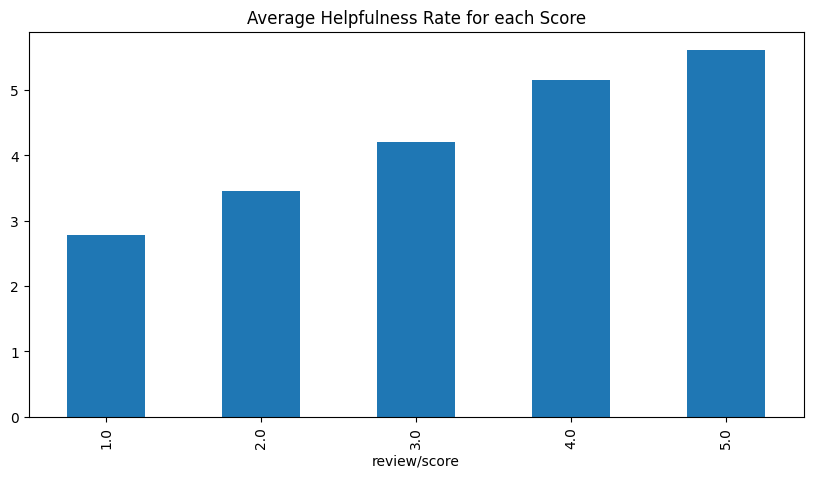

In [88]:
# Remove sample below 100 helpfulness votes
min_votes = 20
filter = df_data['Tot_votes'] > min_votes
df_data_filtered = df_data[filter]

# Check the shape of the data
print(f"The shape of the data is {df_data_filtered.shape}")

# Plot the results
df_data_filtered.plot(kind='scatter', x='review/score', y='review/helpfulness_rate', title='Helpfulness vs Score', figsize=(10,5))

# Compute the average helpfulness rate for each score
plt.figure()
df_data_filtered.groupby('review/score')['review/helpfulness_rate'].mean().plot(kind='bar', title='Average Helpfulness Rate for each Score', figsize=(10,5))

In [89]:
scipy_analize(df_data_filtered['review/score'], 'review/score', df_data_filtered['review/helpfulness_rate'], 'review/helpfulness_rate')

df_grouped_tmp = df_data_filtered.groupby('review/score')['review/helpfulness_rate'].mean()
df_grouped = pd.DataFrame(df_grouped_tmp).reset_index()

The p-value for normality test of review/score is 0.0. The data is not normally distributed.
The p-value for normality test of review/helpfulness_rate is 0.0. The data is not normally distributed.
Since at least one of the variables is not normally distributed, we will use Spearman's correlation.
The p-value for correlation value 0.520716814460294 between review/score and review/helpfulness_rate is 0.0. The correlation is not significant.
The p-value for Kolmogorov-Smirnov test between review/score and review/helpfulness_rate is 0.0. The two variables do not follow the same distribution.
The p-value for Chi-Square test between review/score and review/helpfulness_rate is 1.6948341620343008e-185. The two variables are not independent.
Since at least one of the variables is not normally distributed, we will use Wilcoxon.
The p-value for Wilcoxon test between review/score and review/helpfulness_rate is 0.0. The two variables do not have the same mean.


A relation seems to be present. Let's investigate whether it is due to the total number of votes or to the number of positive votes.

<AxesSubplot: title={'center': 'Average N_helpful Rate for each Score'}, xlabel='review/score'>

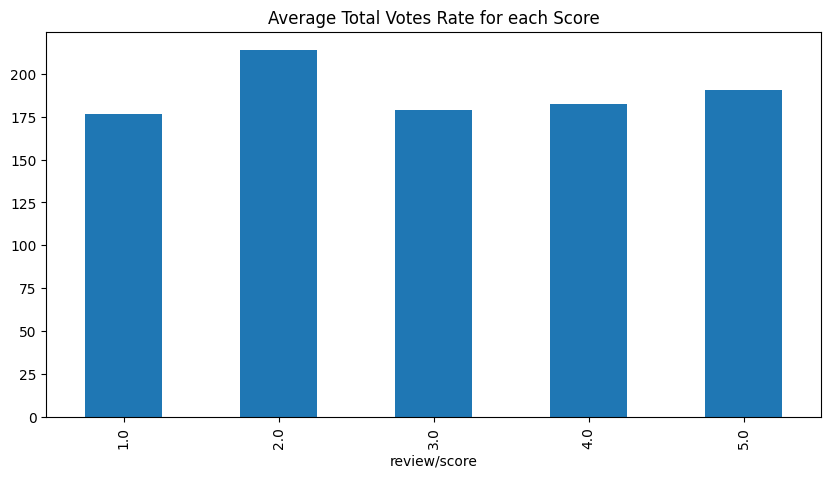

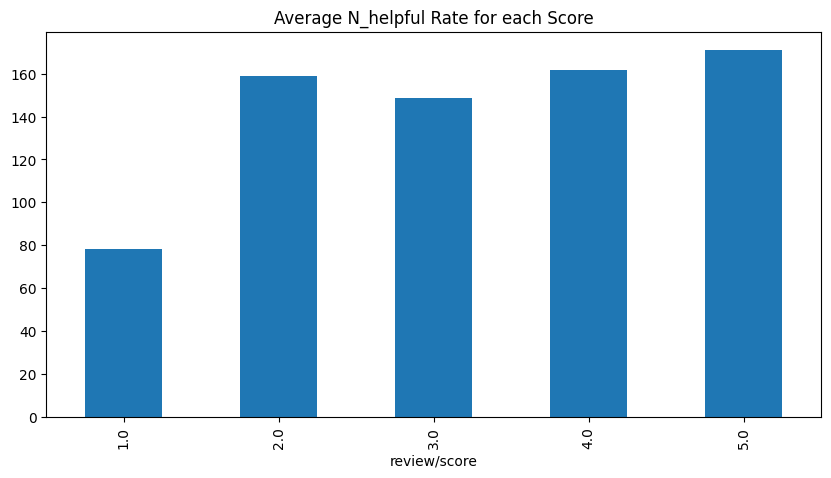

In [80]:
# Compute the average Tot_votes rate for each score
plt.figure()
df_data_filtered.groupby('review/score')['Tot_votes'].mean().plot(kind='bar', title='Average Total Votes Rate for each Score', figsize=(10,5))

# Compute the average N_helpful rate for each score
plt.figure()
df_data_filtered.groupby('review/score')['N_helpful'].mean().plot(kind='bar', title='Average N_helpful Rate for each Score', figsize=(10,5))

The results show that the relation is due to the number of positive votes. This means that on average the positive reviews (higher score) are seen as more helpful than the negative ones (lower score).

### - Filtered on number of votes and grouped in 2 bins (1, 5) and (2, 3, 4)

The shape of the data is (1061, 5)


/tmp/ipykernel_88519/4109958719.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data_filtered['review/score_grouped'] = df_data_filtered['review/score'].apply(lambda x: 1 if x==1 or x==5 else 0)


<AxesSubplot: title={'center': 'Average Helpfulness Rate for each Score'}, xlabel='review/score_grouped'>

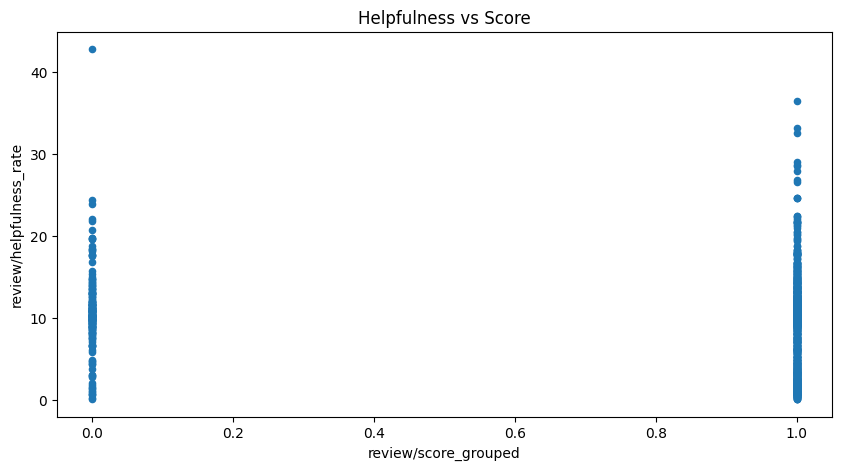

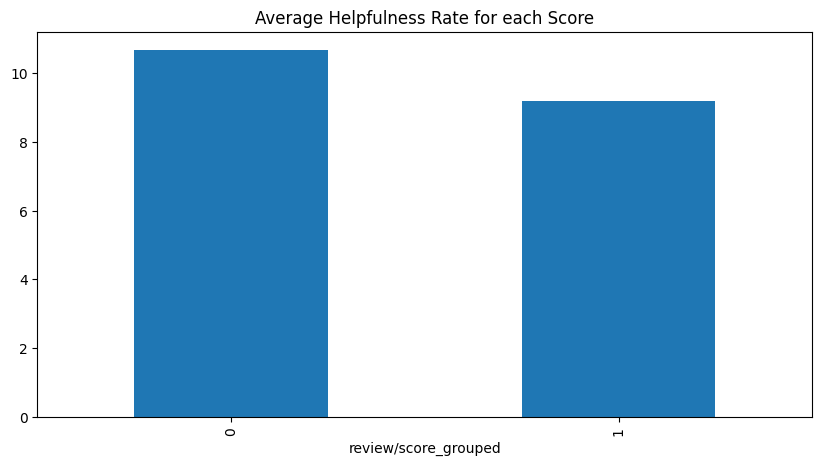

In [9]:
# Group the data having score 1,5 together and 2,3,4 together
df_data_filtered['review/score_grouped'] = df_data_filtered['review/score'].apply(lambda x: 1 if x==1 or x==5 else 0)

# Check the shape of the data
print(f"The shape of the data is {df_data_filtered.shape}")

# Plot the results
df_data_filtered.plot(kind='scatter', x='review/score_grouped', y='review/helpfulness_rate', title='Helpfulness vs Score', figsize=(10,5))

# Compute the average helpfulness rate for each score
plt.figure()
df_data_filtered.groupby('review/score_grouped')['review/helpfulness_rate'].mean().plot(kind='bar', title='Average Helpfulness Rate for each Score', figsize=(10,5))